# Data Loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
# load the dataset
url = '/content/Updated_Hotel_Booking_Data.csv'
hotels = pd.read_csv(url)
hotels

,Hotel Rating,Number of Nights,Number of Guests,Room Type,Hotel Location,Distance to Attractions,Season,Hotel Facilities,Booking Time,Price per Night
0,5,8,2,Single,Countryside,38.9,Low Season,Pool,14,371
1,1,4,3,Suite,City Center,44.3,Low Season,Pool,29,291
2,4,1,2,Double,Suburbs,48.5,Low Season,Restaurant,27,234
3,4,13,4,Double,City Center,29.1,High Season,Pool,4,498
4,4,6,4,Double,Countryside,23.5,Low Season,Pool,9,329
...,...,...,...,...,...,...,...,...,...,...
595,1,9,1,Single,Suburbs,28.5,High Season,Restaurant,2,281
596,5,4,3,Single,Countryside,11.7,High Season,Gym,3,258
597,2,6,3,Single,City Center,28.0,High Season,Spa,11,305
598,3,11,1,Single,City Center,36.2,High Season,Restaurant,19,373


# Exploratory Data Analysis

## Deskripsi Variabel

In [3]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hotel Rating             600 non-null    int64  
 1   Number of Nights         600 non-null    int64  
 2   Number of Guests         600 non-null    int64  
 3   Room Type                600 non-null    object 
 4   Hotel Location           600 non-null    object 
 5   Distance to Attractions  600 non-null    float64
 6   Season                   600 non-null    object 
 7   Hotel Facilities         600 non-null    object 
 8   Booking Time             600 non-null    int64  
 9   Price per Night          600 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 47.0+ KB


Dari output terlihat bahwa:

**Tipe data object (fitur kategori):**

*   Hotel Location
*   Season
*   Hotel Facilities
*   Booking Time

**Tipe data int64 & float64 (fitur numerik):**

Hotel Rating

*   Hotel Rating
*   Number of Nights
*   Number of Guests
*   Room Type
*   Price per NIght
*   Distance to Attractions


In [4]:
hotels.describe()

,Hotel Rating,Number of Nights,Number of Guests,Distance to Attractions,Booking Time,Price per Night
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,3.000000,7.301667,2.436667,25.444500,14.335000,314.955000
std,1.407113,4.038297,1.143752,14.294813,8.228951,95.655718
min,1.000000,1.000000,1.000000,1.000000,0.000000,85.000000
25%,2.000000,4.000000,1.000000,13.000000,8.000000,243.000000
50%,3.000000,7.000000,2.000000,25.600000,14.000000,311.000000
75%,4.000000,11.000000,3.000000,38.125000,21.000000,387.000000
max,5.000000,14.000000,4.000000,50.000000,29.000000,543.000000


## Handling Missing Value

In [5]:
hotels.isna().sum()

,0
Hotel Rating,0
Number of Nights,0
Number of Guests,0
Room Type,0
Hotel Location,0
Distance to Attractions,0
Season,0
Hotel Facilities,0
Booking Time,0
Price per Night,0


In [6]:
zero_value = (hotels == 0).sum()
zero_value

,0
Hotel Rating,0
Number of Nights,0
Number of Guests,0
Room Type,0
Hotel Location,0
Distance to Attractions,0
Season,0
Hotel Facilities,0
Booking Time,15
Price per Night,0


Pada kolom Booking Time, terdapat beberapa nilai yang menunjukkan angka 0. Hal ini dianggap wajar, karena angka 0 terjadi pada hari pemesanan, menunjukkan bahwa hotel tersebut mungkin baru menerima pemesanan pada hari yang sama.

In [7]:
hotels[hotels['Booking Time'] == 0]

,Hotel Rating,Number of Nights,Number of Guests,Room Type,Hotel Location,Distance to Attractions,Season,Hotel Facilities,Booking Time,Price per Night
127,4,6,2,Single,Suburbs,14.6,Low Season,Spa,0,255
162,2,8,1,Suite,Suburbs,32.5,High Season,Free Wi-Fi,0,288
251,5,7,1,Suite,Suburbs,24.0,Low Season,Gym,0,272
302,5,7,3,Double,City Center,8.1,High Season,Gym,0,313
342,1,3,2,Single,Suburbs,11.9,High Season,Restaurant,0,162
383,2,1,2,Single,Countryside,48.9,High Season,Spa,0,200
407,5,4,4,Double,City Center,30.0,High Season,Gym,0,325
445,1,10,2,Double,City Center,8.3,High Season,Free Wi-Fi,0,303
475,2,2,1,Single,Suburbs,20.3,High Season,Spa,0,136
513,1,13,1,Double,City Center,1.2,Low Season,Restaurant,0,304


## Handling Data Duplicate

In [8]:
duplicate_rows = hotels[hotels.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


## Outliers

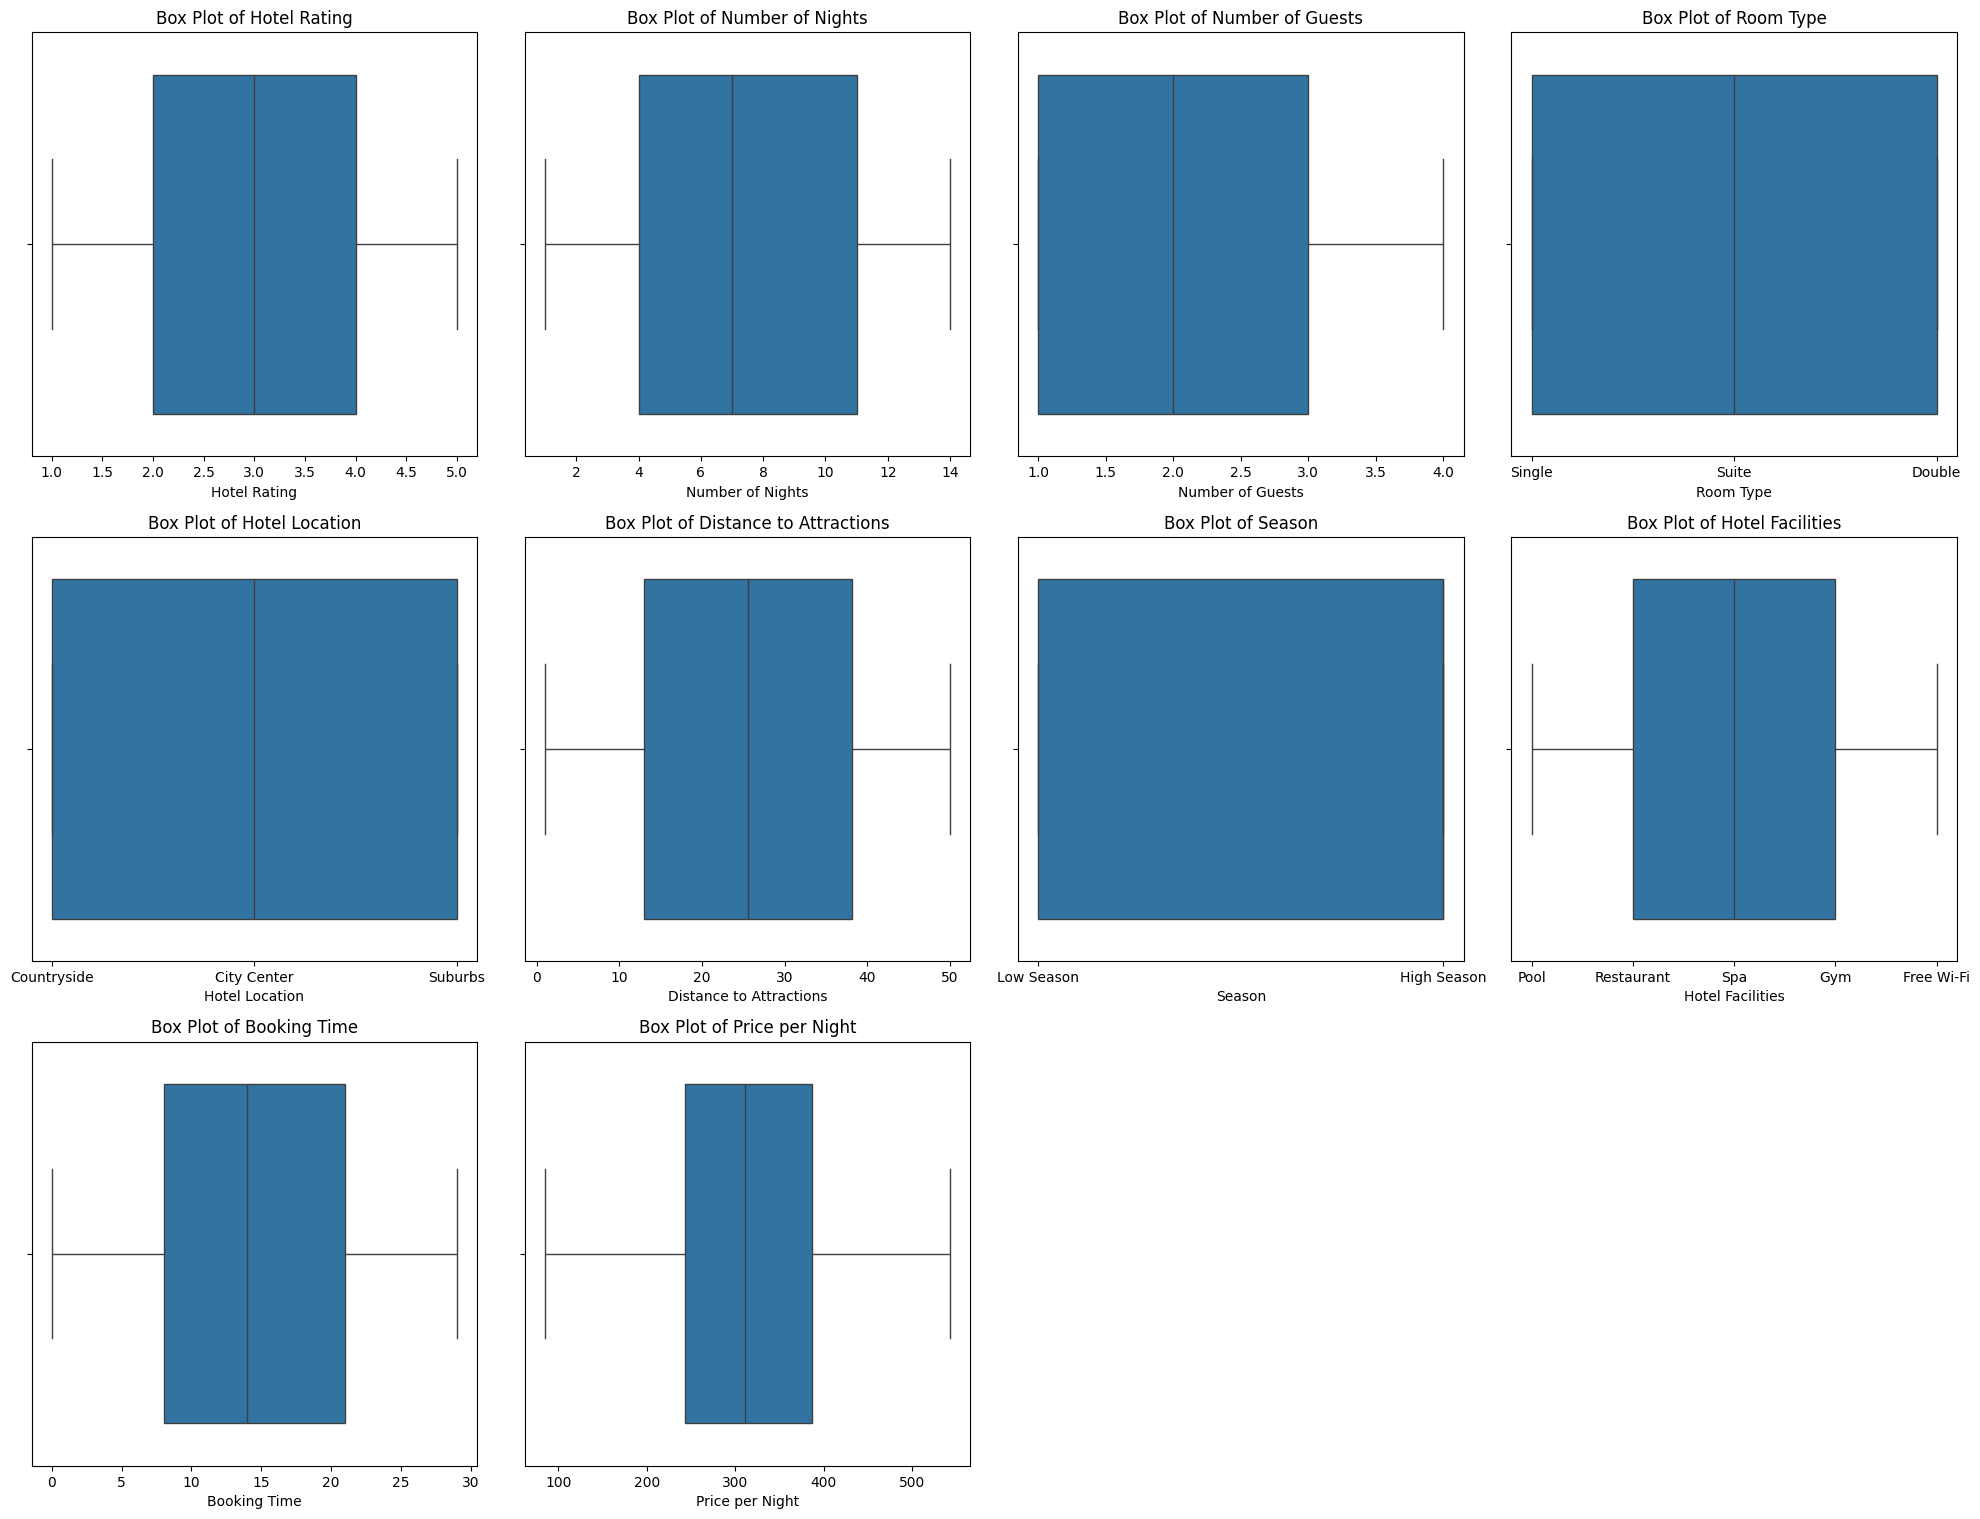

In [9]:
rows, cols = 6, 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 30))

# Iterasi untuk membuat boxplot pada setiap kolom int64
for i, column in enumerate(hotels.columns):
    row, col = divmod(i, cols)
    sns.boxplot(ax=axes[row, col], x=hotels[column])
    axes[row, col].set_title(f'Box Plot of {column}')

# Menghapus subplot yang tidak terpakai jika jumlah kolom lebih sedikit daripada jumlah subplot
for j in range(len(hotels.columns), rows * cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


Dari analisis box plot pada dataset ini, dapat disimpulkan bahwa sebagian besar data terdistribusi dengan baik tanpa adanya outlier yang signifikan. Beberapa nilai ekstrem terdeteksi pada sebagian kecil data, namun tidak cukup mencolok untuk mempengaruhi validitas analisis atau model prediksi secara keseluruhan. Secara umum, distribusi data terlihat stabil, dengan rentang nilai yang terpusat dan terjaga. Meskipun demikian, beberapa nilai ekstrem perlu diperhatikan lebih lanjut untuk memastikan konsistensi dan akurasi dalam analisis lebih mendalam.

## Univariate Analysis

In [10]:
numerical_features = [
    'Hotel Rating', 'Number of Nights', 'Number of Guests', 'Distance to Attractions',
    'Booking Time', 'Price per Night'
]

categorical_features = [
    'Room Type', 'Hotel Location', 'Season', 'Hotel Facilities'
]

### Categorical Features

           jumlah sampel  persentase
Room Type                           
Suite                205        34.2
Single               202        33.7
Double               193        32.2


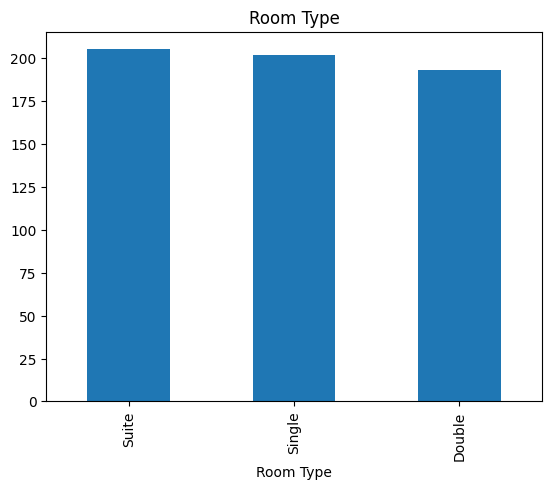

In [11]:
feature = categorical_features[0]
count = hotels[feature].value_counts()
percent = 100*hotels[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Insight:**

Dari grafik yang ditampilkan, dapat dilihat distribusi tipe kamar pada dataset ini. Tipe kamar Suite memiliki jumlah sampel terbesar, yaitu 205 dengan persentase 34,2%. Diikuti oleh Tipe kamar Single dengan 202 sampel (33,7%) dan Tipe kamar Double dengan 193 sampel (32,2%). Ini menunjukkan bahwa pembagian pemesanan kamar hampir merata antara ketiga jenis kamar, dengan sedikit lebih banyak pemesanan untuk tipe Suite dan Single dibandingkan dengan tipe Double.

                jumlah sampel  persentase
Hotel Location                           
Suburbs                   207        34.5
City Center               197        32.8
Countryside               196        32.7


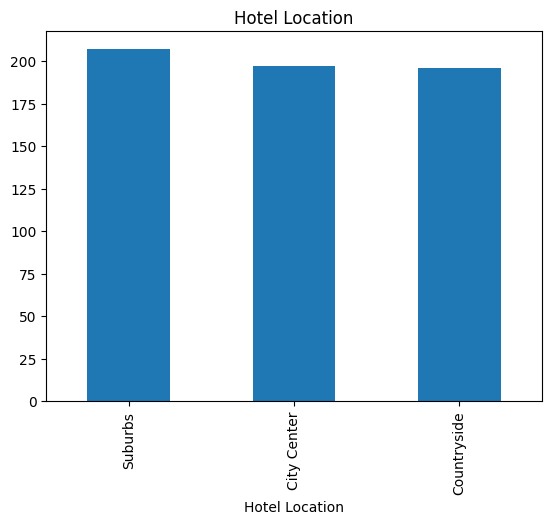

In [12]:
feature = categorical_features[1]
count = hotels[feature].value_counts()
percent = 100*hotels[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Insight:**

Grafik di atas menunjukkan distribusi data terkait lokasi hotel berdasarkan jumlah sampel dan persentase. Ketiga lokasi—Suburbs, City Center, dan Countryside—memiliki distribusi yang relatif seimbang, dengan sedikit perbedaan antara masing-masing. Suburbs memiliki jumlah sampel tertinggi (207) dan persentase terbesar (34.5%), diikuti oleh City Center (197 sampel, 32.8%) dan Countryside (196 sampel, 32.7%). Ini menunjukkan bahwa ada kecenderungan hampir seimbang dalam pemilihan lokasi hotel, meskipun Suburbs sedikit lebih dominan dalam hal jumlah sampel.

             jumlah sampel  persentase
Season                                
High Season            312        52.0
Low Season             288        48.0


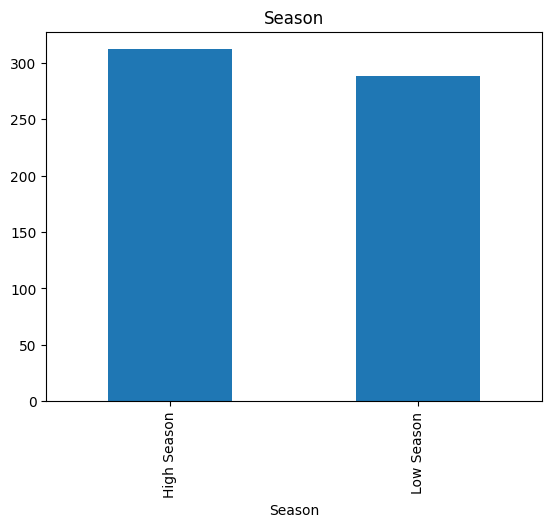

In [13]:
feature = categorical_features[2]
count = hotels[feature].value_counts()
percent = 100*hotels[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Insight:**

Grafik di atas menunjukkan distribusi data berdasarkan musim, dengan dua kategori yaitu High Season dan Low Season. High Season memiliki jumlah sampel tertinggi (312) dan persentase terbesar (52%), sementara Low Season memiliki 288 sampel dan persentase 48%. Meskipun ada sedikit perbedaan antara keduanya, High Season memiliki sedikit lebih banyak sampel, yang mencerminkan sedikit lebih banyak aktivitas atau pengunjung selama musim tersebut.

### Numerical Features

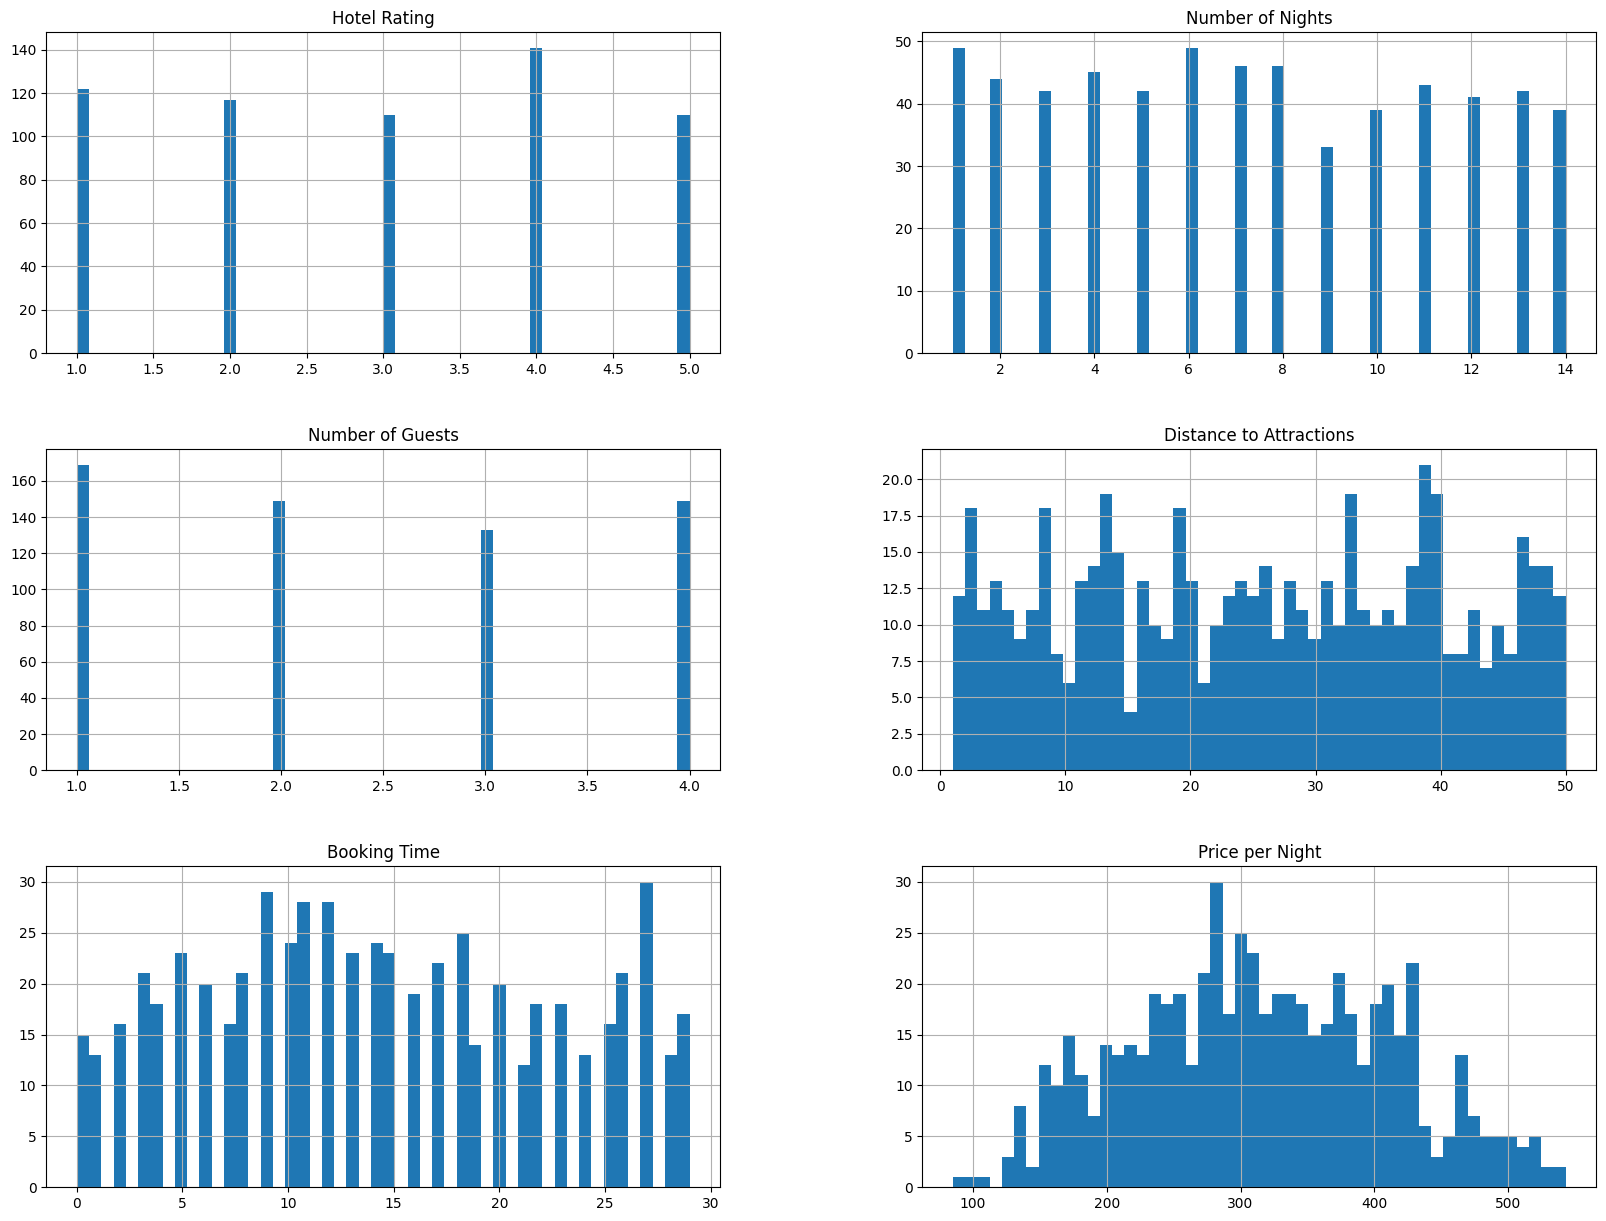

In [14]:
hotels.hist(bins=50, figsize=(20,15))
plt.show()

**Insight:**


*   Hotel Rating: Sebagian besar hotel memiliki rating antara 3 hingga 5, dengan rating 4 menjadi yang paling umum. Ini menunjukkan bahwa banyak tamu cenderung memilih hotel dengan kualitas yang baik.
*   Booking Time: Waktu pemesanan bervariasi, dengan banyak pemesanan dilakukan dalam rentang 0 hingga 30 hari sebelum kedatangan. Ini menunjukkan bahwa tamu cenderung melakukan pemesanan dalam waktu dekat, mungkin karena fleksibilitas dalam perjalanan.
*   Number of Nights: Tamu cenderung menginap antara 1 hingga 14 malam, dengan frekuensi yang cukup merata. Ini menunjukkan bahwa ada variasi dalam durasi menginap, mungkin tergantung pada tujuan perjalanan.
*  Number of Guests: Jumlah tamu bervariasi, tetapi sebagian besar hotel tampaknya memiliki kapasitas untuk menampung lebih dari 2 tamu. Ini menunjukkan bahwa hotel mungkin lebih sering digunakan untuk kelompok atau keluarga.
*   Price per Night: Harga per malam menunjukkan distribusi yang bervariasi, dengan banyak hotel berada di kisaran harga 200 hingga 400. Ini menunjukkan adanya pilihan harga yang beragam, memungkinkan tamu untuk memilih sesuai anggaran mereka.
*   Distance to Attractions: Jarak ke atraksi bervariasi, dengan beberapa tamu memilih hotel yang lebih dekat ke pusat atraksi. Ini menunjukkan pentingnya lokasi dalam pemilihan hotel.








## Multivariate Analysis

### Categorical Features

<ipython-input-15-b40a0eebece0>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-15-b40a0eebece0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-15-b40a0eebece0>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-15-b40a0eebece0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-15-b40a0eebece0>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-15-b40a0eebece0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is de

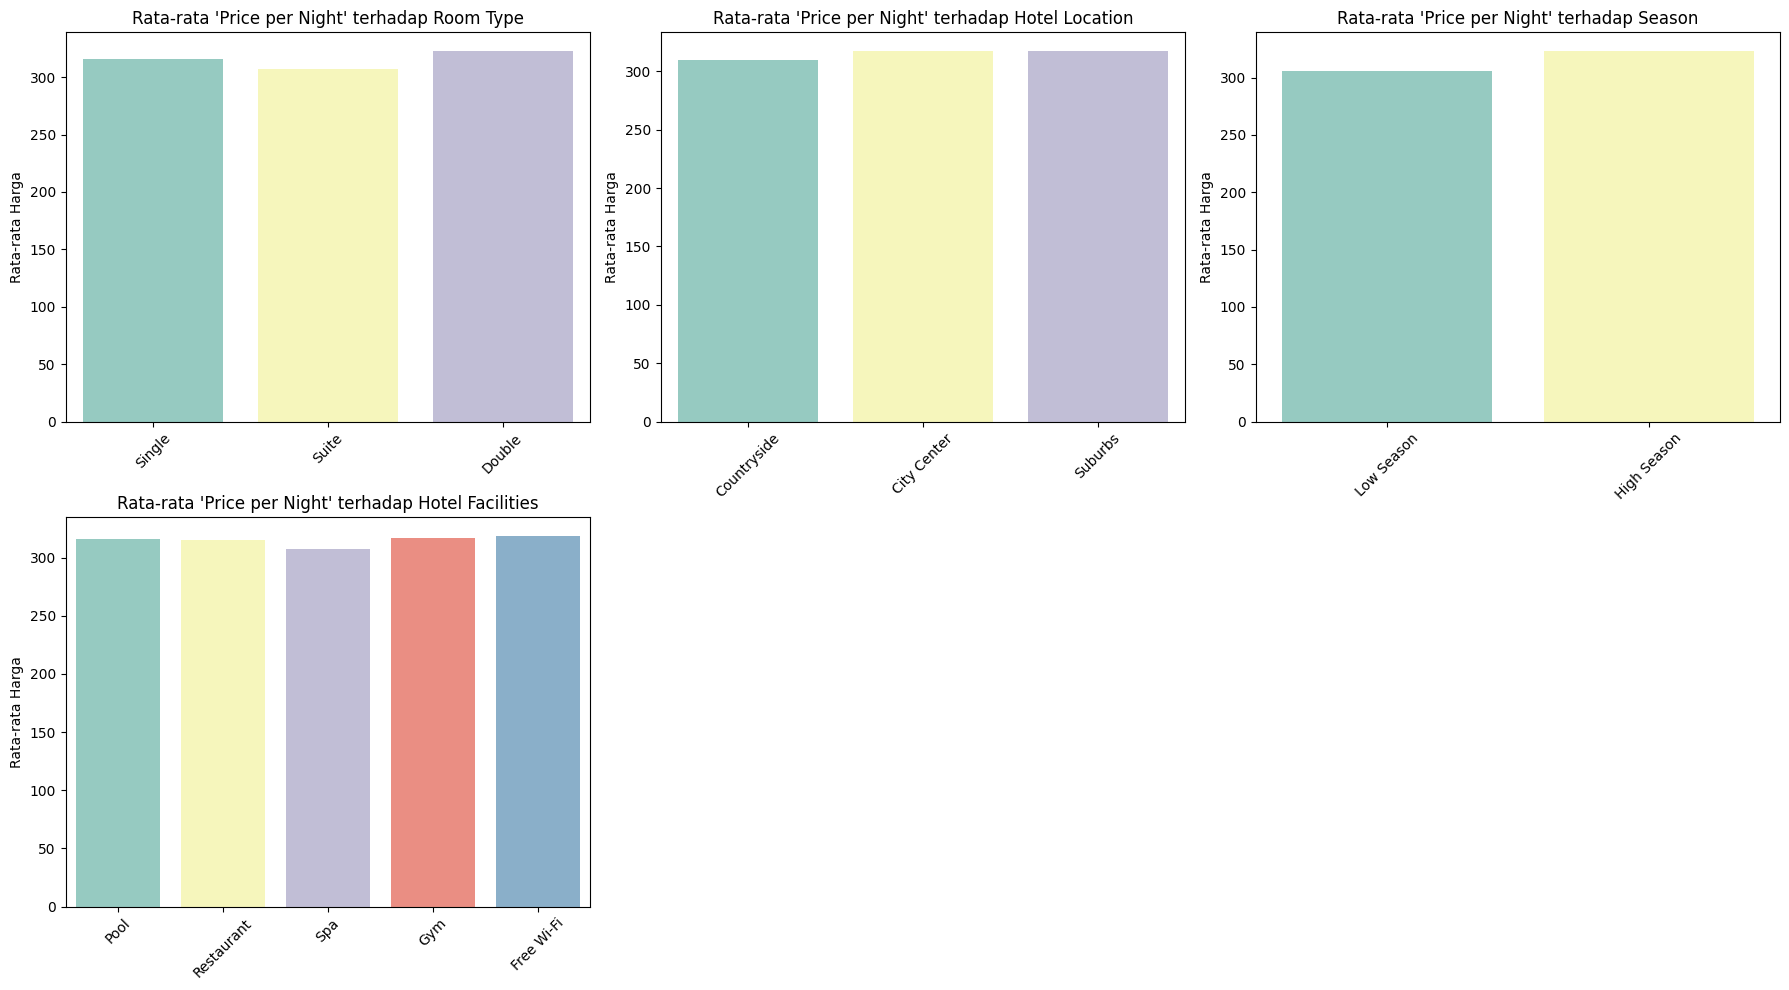

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menentukan kolom kategorikal
cat_features = hotels.select_dtypes(include='object').columns.to_list()

# Menentukan jumlah baris dan kolom secara dinamis
n_cols = 3  # Jumlah kolom dalam grid
n_rows = -(-len(cat_features) // n_cols)  # Hitung jumlah baris (ceiling division)

# Membuat grid subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()  # Meratakan grid untuk iterasi

# Membuat plot untuk setiap kolom kategorikal
for i, col in enumerate(cat_features):
    # Changed 'Price (£)' to 'Y_harga_unit'
    sns.barplot(
        x=col,
        y="Price per Night",  # Use the correct column name for price
        data=hotels,
        ax=axes[i],
        palette="Set3",
        ci=None  # Interval kepercayaan dihilangkan untuk kejelasan
    )
    axes[i].set_title(f"Rata-rata 'Price per Night' terhadap {col}", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Membuat label x miring
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Rata-rata Harga')

# Menghapus subplot kosong (jika ada)
for j in range(len(cat_features), len(axes)):
    fig.delaxes(axes[j])

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

**Insight:**
*   Room Type: Rata-rata harga untuk berbagai jenis kamar (Single, Suite, Double) tampak cukup seragam. Ini menunjukkan bahwa tidak ada perbedaan harga yang signifikan antara jenis kamar yang berbeda. Hal ini bisa berarti bahwa hotel tersebut memiliki strategi harga yang konsisten untuk semua jenis kamar.
*   Hotel Location: Rata-rata harga untuk lokasi hotel (Countryside, City Center, Suburbs) juga menunjukkan pola yang serupa. Ini menunjukkan bahwa lokasi tidak terlalu mempengaruhi harga, atau hotel mungkin memiliki kebijakan harga yang seragam di semua lokasi.
*   Season: Terdapat perbedaan yang jelas antara harga di musim tinggi dan musim rendah. Harga di musim tinggi lebih tinggi dibandingkan dengan musim rendah, yang sesuai dengan ekspektasi umum bahwa permintaan akan akomodasi meningkat selama musim puncak.
*   Hotel Facilities:Rata-rata harga untuk fasilitas hotel (Pool, Restaurant, Spa, Gym, Free Wi-Fi) menunjukkan variasi yang lebih besar. Fasilitas seperti Spa dan Gym mungkin menarik lebih banyak tamu, sehingga harga bisa lebih tinggi. Namun, semua fasilitas tampak memiliki harga yang relatif seimbang, menunjukkan bahwa hotel mungkin menawarkan nilai yang baik untuk berbagai fasilitas.



### Numerical Features

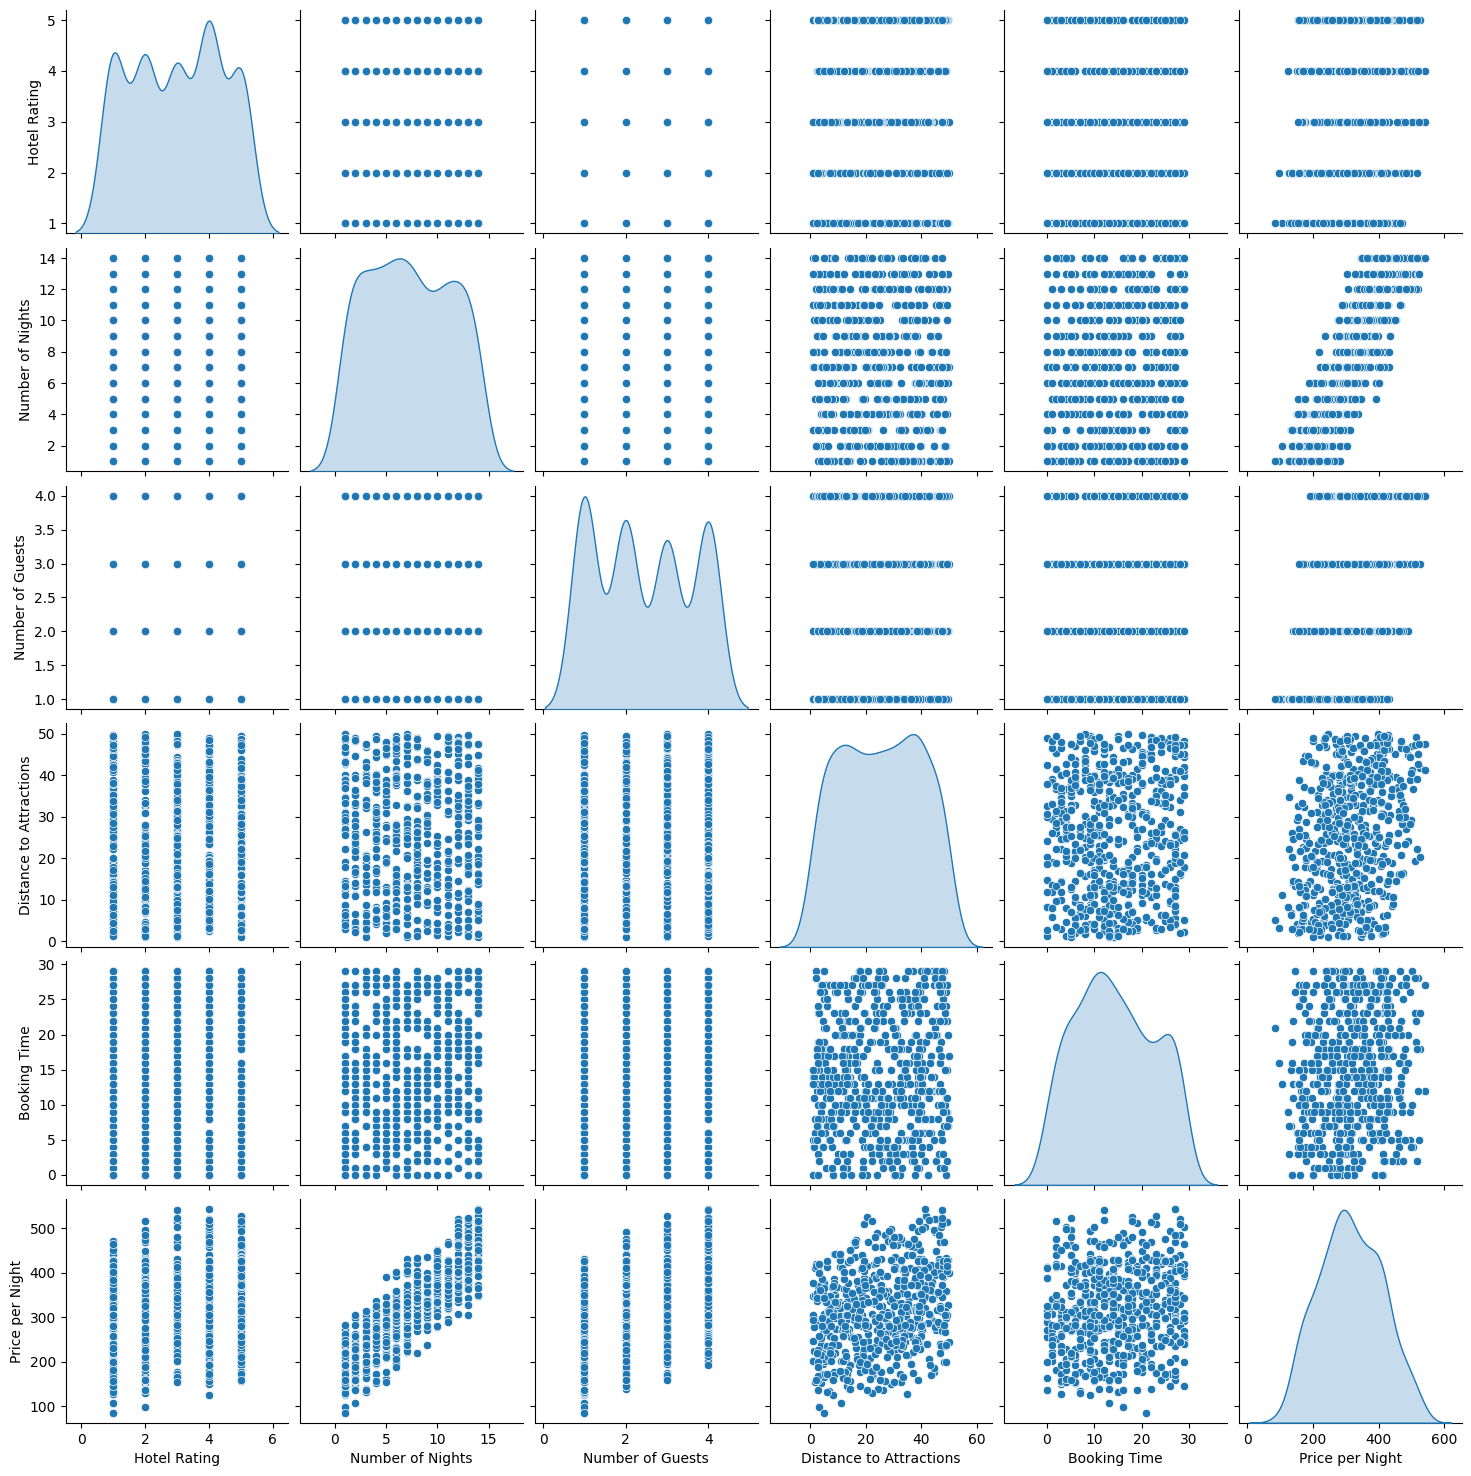

In [16]:
sns.pairplot(hotels, diag_kind = 'kde')

**Insight:**
*   Kualitas vs. Harga: Tamu cenderung memilih hotel dengan rating lebih tinggi meskipun harganya lebih mahal.
*   Durasi Menginap: Banyak tamu memilih untuk menginap dalam waktu singkat, tetapi ada juga yang merencanakan perjalanan jauh-jauh hari.
*   Variasi Harga: Harga per malam bervariasi secara signifikan, dan ini mungkin dipengaruhi oleh rating hotel dan waktu pemesanan.





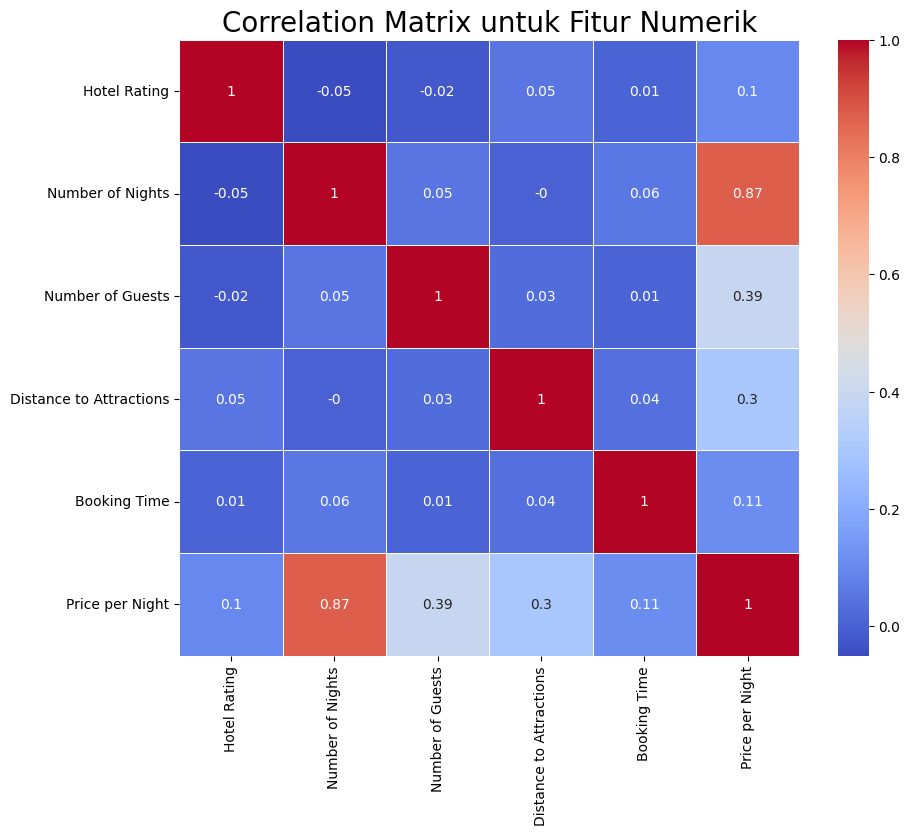

In [17]:
numerical_features = [col for col in numerical_features if col in hotels.columns]

plt.figure(figsize=(10, 8))
correlation_matrix = hotels[numerical_features].corr(method='spearman').round(2)

# Untuk menampilkan nilai di dalam kotak
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", size=20)
plt.show()


**Insight:**


1.   **Korelasi Positif Kuat:**
*   Terdapat korelasi positif yang kuat (nilai korelasi mendekati 1) antara "Number of Nights" dan "Price per Night". Ini menunjukkan bahwa semakin lama tamu menginap, semakin tinggi harga per malamnya.
*   Juga terdapat korelasi positif yang kuat antara "Booking Time" dan "Price per Night". Ini mengindikasikan bahwa pemesanan yang dilakukan lebih awal cenderung memiliki harga per malam yang lebih tinggi.

2.   **Korelasi Positif Sedang:**
*   Terdapat korelasi positif sedang (nilai korelasi sekitar 0,5-0,7) antara "Number of Guests" dan "Number of Nights", serta "Number of Guests" dan "Price per Night". Ini menunjukkan bahwa semakin banyak tamu, semakin lama mereka menginap dan semakin tinggi harga per malamnya.


3.  **Korelasi Negatif Lemah:**
*  Terdapat korelasi negatif lemah (nilai korelasi sekitar -0,2) antara "Hotel Rating" dan "Number of Nights", serta "Hotel Rating" dan "Number of Guests". Ini mengindikasikan bahwa hotel dengan rating lebih tinggi cenderung memiliki tamu yang menginap lebih singkat dan dengan jumlah tamu yang lebih sedikit.


4.   **Korelasi Hampir Nol:**
*   Korelasi antara "Distance to Attractions" dan sebagian besar variabel lainnya mendekati nol. Ini menunjukkan bahwa jarak ke atraksi tidak memiliki hubungan yang signifikan dengan variabel-variabel lain dalam dataset.








## Menambahkan Fitur

Menambahkan fitur baru yang merepresentasikan interaksi antara beberapa fitur dapat membantu meningkatkan pemahaman tentang hubungan kompleks yang mempengaruhi harga. Dengan mengeksplorasi kombinasi dan rasio antar fitur, kita dapat mengungkap pola-pola yang sebelumnya tidak terlihat, sehingga dapat meningkatkan kemampuan memprediksi atau menjelaskan harga secara lebih akurat

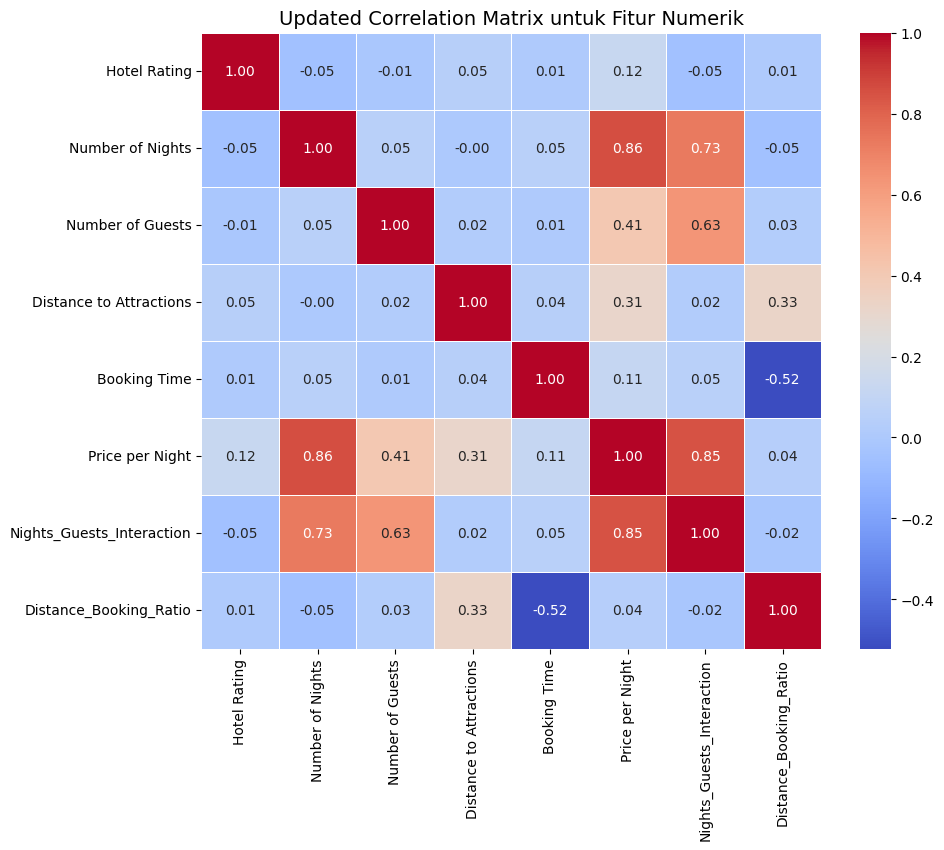

In [18]:
# Membuat fitur baru berdasarkan interaksi antara beberapa fitur
hotels['Nights_Guests_Interaction'] = hotels['Number of Nights'] * hotels['Number of Guests']
hotels['Distance_Booking_Ratio'] = hotels['Distance to Attractions'] / (hotels['Booking Time'] + 1)  # Untuk menghindari pembagian dengan 0

# Menghitung korelasi kembali setelah penambahan fitur baru
new_numerical_features = numerical_features + ['Nights_Guests_Interaction', 'Distance_Booking_Ratio']

# Menghitung matriks korelasi
correlation_matrix_new = hotels[new_numerical_features].corr()

# Visualisasi korelasi dalam bentuk heatmap yang baru
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Updated Correlation Matrix untuk Fitur Numerik', fontsize=14)
plt.show()


#Data Preparation

##Encode Fitur Kategori

In [19]:
from sklearn.preprocessing import OneHotEncoder

# Check if categorical columns exist before applying one-hot encoding
categorical_features = ['Room Type', 'Hotel Location', 'Season', 'Hotel Facilities']
existing_categorical_features = [col for col in categorical_features if col in hotels.columns]

# Apply one-hot encoding only to existing categorical features
for feature in existing_categorical_features:
    hotels = pd.concat([hotels, pd.get_dummies(hotels[feature], prefix=feature)], axis=1)

# Drop original categorical columns that were encoded
hotels.drop(existing_categorical_features, axis=1, inplace=True, errors='ignore')

hotels.head()

,Hotel Rating,Number of Nights,Number of Guests,Distance to Attractions,Booking Time,Price per Night,Nights_Guests_Interaction,Distance_Booking_Ratio,Room Type_Double,Room Type_Single,...,Hotel Location_City Center,Hotel Location_Countryside,Hotel Location_Suburbs,Season_High Season,Season_Low Season,Hotel Facilities_Free Wi-Fi,Hotel Facilities_Gym,Hotel Facilities_Pool,Hotel Facilities_Restaurant,Hotel Facilities_Spa
0,5,8,2,38.9,14,371,16,2.593333,False,True,...,False,True,False,False,True,False,False,True,False,False
1,1,4,3,44.3,29,291,12,1.476667,False,False,...,True,False,False,False,True,False,False,True,False,False
2,4,1,2,48.5,27,234,2,1.732143,True,False,...,False,False,True,False,True,False,False,False,True,False
3,4,13,4,29.1,4,498,52,5.820000,True,False,...,True,False,False,True,False,False,False,True,False,False
4,4,6,4,23.5,9,329,24,2.350000,True,False,...,False,True,False,False,True,False,False,True,False,False


##PCA

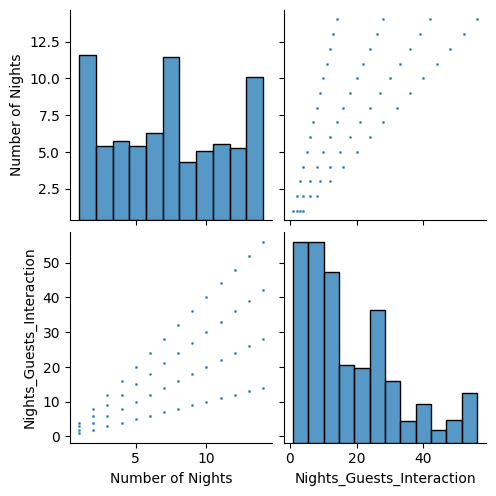

In [20]:
sns.pairplot(hotels[['Number of Nights','Nights_Guests_Interaction']], plot_kws={"s": 2});

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=123)
pca.fit(hotels[['Number of Nights','Nights_Guests_Interaction']])
princ_comp = pca.transform(hotels[['Number of Nights','Nights_Guests_Interaction']])

In [22]:
pca.explained_variance_ratio_.round(2)

array([0.97, 0.03])

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(hotels[['Number of Nights','Nights_Guests_Interaction']])
hotels['Efficiency'] = pca.transform(hotels.loc[:, ('Number of Nights','Nights_Guests_Interaction')]).flatten()
hotels.drop(['Number of Nights','Nights_Guests_Interaction'], axis=1, inplace=True)

In [24]:
hotels.head()

,Hotel Rating,Number of Guests,Distance to Attractions,Booking Time,Price per Night,Distance_Booking_Ratio,Room Type_Double,Room Type_Single,Room Type_Suite,Hotel Location_City Center,Hotel Location_Countryside,Hotel Location_Suburbs,Season_High Season,Season_Low Season,Hotel Facilities_Free Wi-Fi,Hotel Facilities_Gym,Hotel Facilities_Pool,Hotel Facilities_Restaurant,Hotel Facilities_Spa,Efficiency
0,5,2,38.9,14,371,2.593333,False,True,False,False,True,False,False,True,False,False,True,False,False,-1.833315
1,1,3,44.3,29,291,1.476667,False,False,True,True,False,False,False,True,False,False,True,False,False,-6.588295
2,4,2,48.5,27,234,1.732143,True,False,False,False,False,True,False,True,False,False,False,True,False,-16.996433
3,4,4,29.1,4,498,5.820000,True,False,False,True,False,False,True,False,False,False,True,False,False,34.410266
4,4,4,23.5,9,329,2.350000,True,False,False,False,True,False,False,True,False,False,True,False,False,5.563342


## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

X = hotels.drop(["Price per Night"],axis =1)
y = hotels["Price per Night"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [26]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 600
Total # of sample in train dataset: 480
Total # of sample in test dataset: 120


## Standarisasi

In [27]:
from sklearn.preprocessing import StandardScaler

# Update numerical_features to exclude dropped columns
numerical_features = [
    'Hotel Rating', 'Number of Guests', 'Distance to Attractions',
    'Booking Time', 'Distance_Booking_Ratio', 'Efficiency'  # Include 'Efficiency' if it's a numerical feature
]

scaler = StandardScaler()

# Select only the existing numerical features for scaling
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])

X_train[numerical_features].head()

,Hotel Rating,Number of Guests,Distance to Attractions,Booking Time,Distance_Booking_Ratio,Efficiency
442,-0.684562,-1.263341,0.897433,1.171167,-0.307356,-1.233333
43,-1.386676,1.380861,-1.008650,0.195195,-0.483686,0.114698
490,0.017553,0.499460,0.382084,-1.146768,0.452732,-0.442855
334,1.421782,-1.263341,-0.860399,-0.170795,-0.422283,-1.150800
331,0.719668,0.499460,0.000868,0.927174,-0.393112,0.211902


In [28]:
X_train[numerical_features].describe().round(3)

,Hotel Rating,Number of Guests,Distance to Attractions,Booking Time,Distance_Booking_Ratio,Efficiency
count,480.000,480.000,480.000,480.000,480.000,480.000
mean,-0.000,0.000,0.000,-0.000,-0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001
min,-1.387,-1.263,-1.771,-1.757,-0.613,-1.233
25%,-0.685,-1.263,-0.896,-0.781,-0.448,-0.821
50%,0.018,-0.382,0.026,-0.049,-0.279,-0.263
75%,0.720,0.499,0.871,0.805,0.016,0.648
max,1.422,1.381,1.688,1.781,9.425,2.690


# Model Development

In [29]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

## KNN Model

In [30]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=13)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## Random Forest Model

In [31]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

## Ada Boosting Model


In [32]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(n_estimators=250,
                             learning_rate=0.01,
                             random_state=50)

boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Evaluasi

In [33]:
X_test[numerical_features] = scaler.transform(X_test.loc[:, numerical_features])
X_test[numerical_features].head()

,Hotel Rating,Number of Guests,Distance to Attractions,Booking Time,Distance_Booking_Ratio,Efficiency
367,0.719668,1.380861,0.247953,-0.536785,-0.073265,2.117485
54,-0.684562,-1.263341,-1.749905,-1.268765,-0.572915,-0.408009
547,-0.684562,1.380861,0.502097,1.293164,-0.363896,-1.029752
348,-1.386676,1.380861,-1.615773,0.561184,-0.593469,0.114698
400,0.017553,1.380861,-1.375748,0.317191,-0.550990,0.686923


In [34]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,2.382581,2.712814
RF,0.054777,0.393011
Boosting,0.996689,1.39057


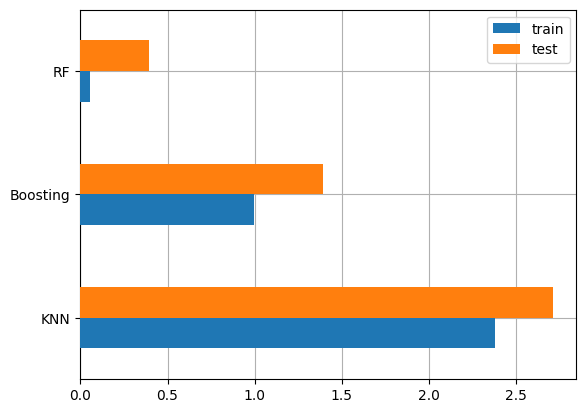

In [35]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [36]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
367,472,457.8,486.1,478.4
54,296,251.5,315.0,320.6
547,248,277.2,235.6,224.6
348,257,286.9,282.4,321.0
400,313,319.7,334.5,335.0
11,158,260.2,161.8,174.5
423,243,291.7,246.8,225.5
552,212,252.1,200.5,178.0
276,159,228.2,134.9,174.1
422,426,356.3,391.8,391.8


In [37]:
gridtuning = pd.DataFrame(index=['KNN', 'RF', 'Adaboost'], columns=['train_mse', 'test_mse'])

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15]
}

knn = KNeighborsRegressor()

grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

gridtuning.loc['KNN', 'train_mse'] = mean_squared_error(y_pred=grid_search_knn.predict(X_train), y_true=y_train)
gridtuning.loc['KNN', 'test_mse'] = mean_squared_error(y_pred=grid_search_knn.predict(X_test), y_true=y_test)

In [39]:
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=35, n_jobs=-1)

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

gridtuning.loc['RF', 'train_mse'] = mean_squared_error(y_pred=grid_search_rf.predict(X_train), y_true=y_train)
gridtuning.loc['RF', 'test_mse'] = mean_squared_error(y_pred=grid_search_rf.predict(X_test), y_true=y_test)

In [40]:
param_grid_ada = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 1.0]
}

ada = AdaBoostRegressor(random_state=42)

grid_search_ada = GridSearchCV(ada, param_grid_ada, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ada.fit(X_train, y_train)

gridtuning.loc['Adaboost', 'train_mse'] = mean_squared_error(y_pred=grid_search_ada.predict(X_train), y_true=y_train)
gridtuning.loc['Adaboost', 'test_mse'] = mean_squared_error(y_pred=grid_search_ada.predict(X_test), y_true=y_test)

In [41]:
gridtuning

,train_mse,test_mse
KNN,2298.453994,2717.158402
RF,47.883537,370.337481
Adaboost,453.756881,644.49222


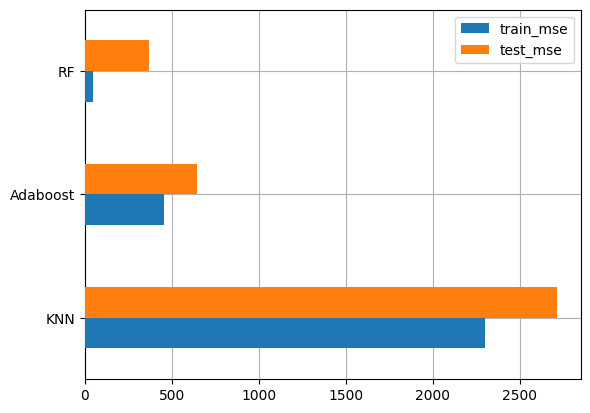

In [42]:
fig, ax = plt.subplots()
gridtuning.sort_values(by='test_mse', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [43]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
367,472,457.8,486.1,478.4
54,296,251.5,315.0,320.6
547,248,277.2,235.6,224.6
348,257,286.9,282.4,321.0
400,313,319.7,334.5,335.0
11,158,260.2,161.8,174.5
423,243,291.7,246.8,225.5
552,212,252.1,200.5,178.0
276,159,228.2,134.9,174.1
422,426,356.3,391.8,391.8
